#### Introduction
This is a fun excercise where I will use Markov Chain model to generate random Hitler speech snippets using existing dataset of hitler speeches. I will also do a detailed analysis of speeches using nltk.

<center>
<img src="hitler.jpg" width=300px>
<br>
</center>

In [1]:
import markovify
import pandas as pd
import re
from time import time
import nltk
nltk.data.path.append("/media/newhd/PyScripts/nltk")

Reading Data

In [2]:
f = open('hitler_speeches.txt','r')
speeches = f.read()

In [3]:
speeches[0:50]

'Munich, Gathering of the SA — Speech of November 9'

Creating Speech Generator using Markov Chain Model is based on Markov assumption that future is independent of the past and depends only on the present. During text generation, Markov chain generator uses current word or previous words depending on state size, here I have used state size of 3 so generator use previous 3 words to find the next one using transition probabilities. These transition probabilities are trained from the input text by calculating how frequently words follows other words. I have introduced similar Markov Chain & Language model concepts in my earlier blog post https://mohitatgithub.github.io/2018-04-03-Introduction-to-Language-Models/.

In [4]:
start_time = time()
speech_generator = markovify.Text(speeches, state_size=3)
print("Run time for training the generator : {} seconds".format(round(time()-start_time, 2)))

Run time for training the generator : 0.21 seconds


Generating random speech fragments using generator

In [5]:
for i in range(5):
    print(speech_generator.make_sentence())

Surely, it is seldom that a political leader who had been trained in that sphere result in internationalism.
None
The road leading into the future with fanatical confidence.
No power in the world.
This Germany was in a position to adopt such a positive policy with regard to that which we heard read from the Polish local administrative officials and military authorities.


Generating random speech fragments with fixed length

In [6]:
for i in range(3):
    print(speech_generator.make_short_sentence(140))

Added to that was a sacred oath which I will keep so long as there has been far, far too little criticism.
And, just as of old, I proclaimed that we should ever accept help from a bolshevist State.
This demand does not take the form of food and raw materials.


#### Text Processing & Analysis
This part is optional, here I have further analysed hilter speeches using nltk below

Removing special characters

In [7]:
speeches  = re.sub('[^A-Za-z0-9]+', ' ', speeches)

Tokenization

In [8]:
speeches = re.split(r'[ \t\n]+', speeches)
speeches[0:10]

['Munich',
 'Gathering',
 'of',
 'the',
 'SA',
 'Speech',
 'of',
 'November',
 '9',
 '1921']

Converting all words in same case before checking books vocabulary

In [9]:
tokens = []
for word in speeches:
    tokens.append(word.lower())

Checking Vocabulary of speeches

In [10]:
vocab = set(tokens)
len(vocab)

6926

Finding lexical richness of speeches

In [11]:
len(set(tokens))/len(tokens)

0.08037227005825423

Coverting tokens to nltk text format

In [12]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

Removing Stop Words

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_text = [w for w in tokens if not w in stop_words]

Chekcing 50 most frequent words from hitler speeches

In [14]:
from nltk import FreqDist

filtered_text = nltk.Text(filtered_text)
fd = FreqDist(filtered_text)
fd.most_common(50)

[('people', 584),
 ('german', 518),
 ('germany', 397),
 ('one', 356),
 ('world', 288),
 ('must', 262),
 ('war', 244),
 ('us', 243),
 ('state', 222),
 ('would', 215),
 ('time', 198),
 ('today', 183),
 ('life', 172),
 ('great', 171),
 ('years', 165),
 ('national', 161),
 ('nation', 151),
 ('reich', 143),
 ('economic', 140),
 ('first', 138),
 ('could', 134),
 ('also', 123),
 ('men', 120),
 ('two', 120),
 ('even', 118),
 ('know', 117),
 ('peace', 115),
 ('work', 114),
 ('say', 113),
 ('never', 112),
 ('whole', 112),
 ('government', 112),
 ('may', 110),
 ('made', 106),
 ('power', 103),
 ('peoples', 100),
 ('british', 99),
 ('every', 98),
 ('last', 95),
 ('new', 94),
 ('man', 94),
 ('right', 92),
 ('cannot', 91),
 ('upon', 90),
 ('nations', 88),
 ('come', 87),
 ('political', 85),
 ('nothing', 85),
 ('possible', 83),
 ('way', 83)]

Checking dispersion plot for selected words in hitler speeches

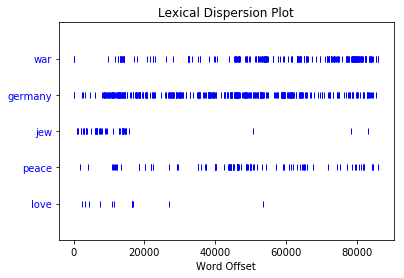

In [15]:
text.dispersion_plot(["war","germany", "jew", "peace", "love"])

Plotting word frequency of most frequent words

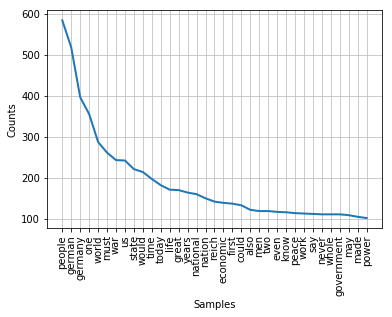

In [16]:
fd.plot(35)

Checking the context in which some of these frequent words appear

In [17]:
filtered_text.concordance("war")

Displaying 25 of 244 matches:
ious jews munich speech april 12 1922 war production begun thought better times
es coming frederick great seven years war result superhuman efforts left prussi
 prussia without penny debt end world war germany burdened debt 7 8 milliards m
n german fatherland three years waged war often death devil always german fathe
kewarmness even fight existence world war still conclusion peace continuation h
 example mortal decay see reich today war two states germany france live side s
rmany france live side side arms true war 1870 1 meant germany close enmity end
ly enough cause finally america enter war germany outbreak world war judah desi
rica enter war germany outbreak world war judah desired paassionately long larg
pplying ammunitions supplied european war market extent perhaps even never drea
national states could prevented world war kul tursolidaritat solidarity civiliz
ny words interest workers germany win war could freemasons perhaps stop war nob
win war co

In [18]:
filtered_text.concordance("germany")

Displaying 25 of 397 matches:
ia without penny debt end world war germany burdened debt 7 8 milliards marks b
st world called reparations product germany work thus belonged nation foreign c
ividual realize without disputation germany united free finally fail understand
either right left two possibilities germany imagine people forever go middle pa
ryans dark aborigines egypt rome us germany everyone german blood eyes speaks l
w german bands flowing empire north germany collapses today come us german bloo
g grow influence impossible history germany princes time time found forced bran
scourge god see scourge threatening germany us people mad infatuation contribut
ite defenseless face europe hostile germany europe hostile see europe peoples a
on drives ruin driven masses people germany becoming political sphere completel
evelopment goes time might possible germany light come destined light germany w
e germany light come destined light germany world salvation point everlasting l
pan german

#### Refrences

1. Markovify: https://github.com/jsvine/markovify
2. NLTK: https://www.nltk.org/

_Thanks for reading this notebook, In future I will integrate hitler speech generator model with telegram chatbot where we can actually have a conversation with hitler!_